In [ ]:
import sys
sys.path.append('../../code/')

In [2]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from postprocessing import similarity

# Setup

In [ ]:
SIMILARITY_PATH = '../../results/similarities'
PLOTS_PATH = '../../results/plots'

In [4]:
vis.sns_reset()
vis.sns_paper_style()

## Data

In [5]:
df_similarities = io.pd.concat([io.read_csv(io.path_join(SIMILARITY_PATH, f"{model}_{task_name}.csv"), index_col=0) for model in constants.LLMS for task_name in constants.EXPERIMENT_TASKS], ignore_index=True)
df_similarities.loc[:,'group'] = df_similarities.apply(helpers.assign_ax_to_task_param, axis=1)
df_similarities.shape

[2025-05-24 04:51:34] Error: [Errno 2] No such file or directory: '../results/similarities/gemma2-9b_seniority.csv'
[2025-05-24 04:51:34] Error: [Errno 2] No such file or directory: '../results/similarities/gemma2-9b_twins.csv'


(7248, 25)

In [6]:
control_groups = ['politic_female','politic_male','movie_female','movie_male','ficticious_female','ficticious_male']
legend = constants.EXPERIMENT_TASK_PARAMS_ORDER_EXPANDED

# remove control groups
if control_groups:
    df_similarities = df_similarities.query("task_param not in @control_groups").copy()
    legend = [tk for tk in legend if tk not in constants.TASK_TWINS_CONTROL]

legend_ncols = len(legend) / 2
legend_bbox = 0.009 if legend_ncols == 9 else 0.22 if legend_ncols == 6 else 0.2

# Similarity among recommended authors

## Career age, and scholrly metrics similarity

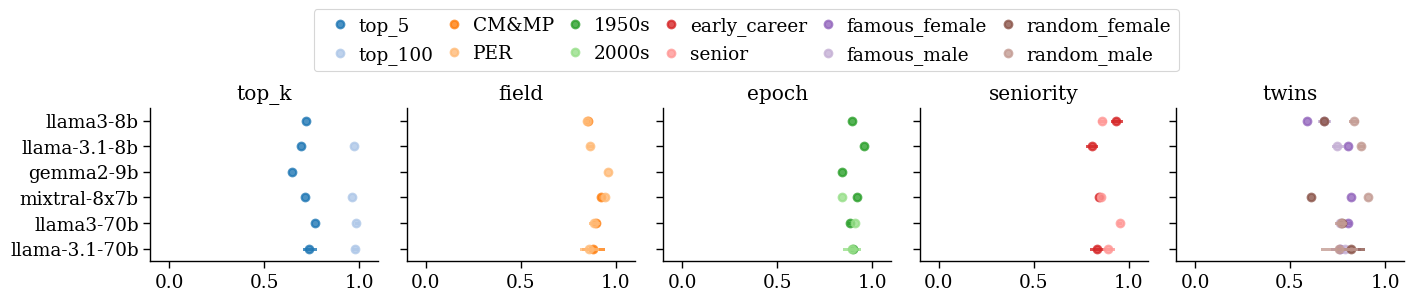

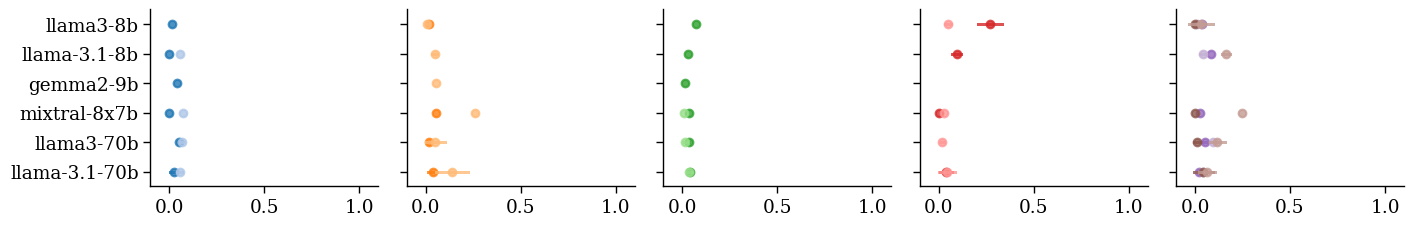

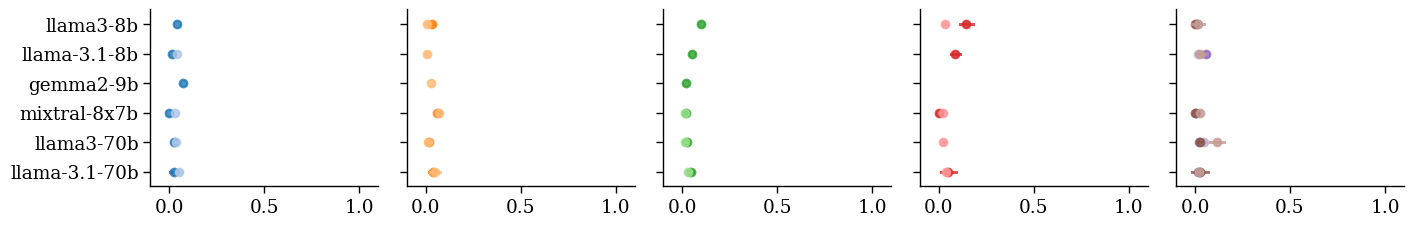

In [7]:
metrics = ['career_age_similarity', 'aps_scholarly_similarity', 'oa_scholarly_similarity']

for row, metric in enumerate(metrics):
    smooth = 1 if metric.startswith('n_') else 0.1
    xlim = (0,150) if metric.startswith('n_') else (0,1)
    xlim = (xlim[0]-smooth, xlim[1]+smooth)
    log = True if metric.startswith('n_') else False

    fg = vis.sns.FacetGrid(df_similarities, col='task_name',
                            palette='tab20', hue="task_param", hue_order=legend,
                            margin_titles=False,
                            height=2.5, aspect=1.15, 
                            xlim=xlim)

    fg.map(vis.sns.pointplot,  metric, "model",  order=constants.LLMS, 
           estimator='mean', errorbar=("sd", 1), 
           marker="o", ls='', 
           dodge=True,
           legend=False, 
           alpha=0.8)
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_ylabels('')
    fg.tight_layout()
    fg.fig.subplots_adjust(wspace=0.05)
    fg.set_xlabels('')

    label = f'Gini coefficient of {metric.split("_similarity")[0]}' if '_age_' in metric else \
            f'Average pairwise Jaccard similarity on {metric.split("_share")[0]}' if 'share' in metric else \
            f'Average pairwise cosine similarity of scholarly metrics' if 'scholarly_similarity' == metric else ''
    
    #fg.axes.flat[2].set_xlabel(label)

    if log:
        fg.set(xscale="symlog")

    if row == 0:
        fg.set_titles("{col_name}") 
        fg.fig.legend(loc='upper left', bbox_to_anchor=(legend_bbox, 1.25), ncol=legend_ncols, columnspacing=0.15, handletextpad=0) #, borderpad=0.2) #, labelspacing=0, handletextpad=0.1, columnspacing=0.1)
    else:
        fg.set_titles("") 


    fn = io.path_join(PLOTS_PATH, f"app_similarity_{metric}.pdf")
    vis._finish_plot(fg.fig, fn)

### Only career age

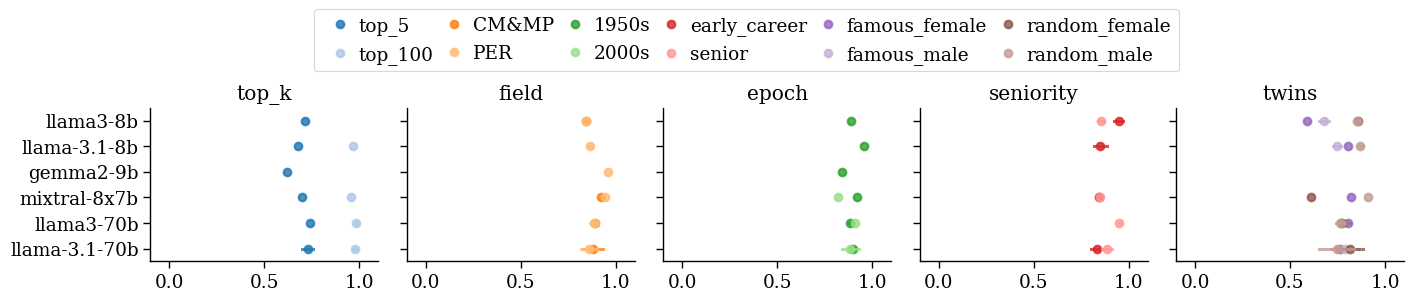

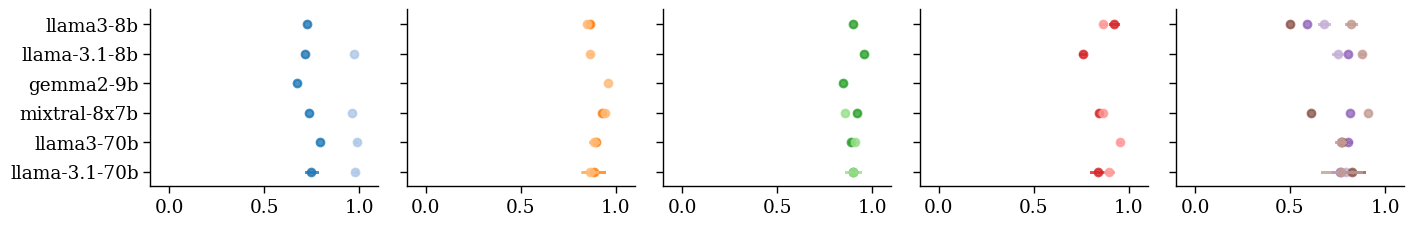

In [8]:
metrics = ['aps_career_age_similarity', 'oa_career_age_similarity']

for row, metric in enumerate(metrics):
    smooth = 1 if metric.startswith('n_') else 0.1
    xlim = (0,150) if metric.startswith('n_') else (0,1)
    xlim = (xlim[0]-smooth, xlim[1]+smooth)
    log = True if metric.startswith('n_') else False

    fg = vis.sns.FacetGrid(df_similarities, col='task_name',
                            palette='tab20', hue="task_param", hue_order=legend,
                            margin_titles=False,
                            height=2.5, aspect=1.15, 
                            xlim=xlim)

    fg.map(vis.sns.pointplot,  metric, "model",  order=constants.LLMS, 
           estimator='mean', errorbar=("sd", 1), 
           marker="o", ls='', 
           dodge=True,
           legend=False, 
           alpha=0.8)
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_ylabels('')
    fg.tight_layout()
    fg.fig.subplots_adjust(wspace=0.05)
    fg.set_xlabels('')

    label = f'Gini coefficient of {metric.split("_similarity")[0]}' if '_age_' in metric else \
            f'Average pairwise Jaccard similarity on {metric.split("_share")[0]}' if 'share' in metric else \
            f'Average pairwise cosine similarity of scholarly metrics' if 'scholarly_similarity' == metric else ''
    
    #fg.axes.flat[2].set_xlabel(label)

    if log:
        fg.set(xscale="symlog")

    if row == 0:
        fg.set_titles("{col_name}") 
        fg.fig.legend(loc='upper left', bbox_to_anchor=(legend_bbox, 1.25), ncol=legend_ncols, columnspacing=0.15, handletextpad=0) #, borderpad=0.2) #, labelspacing=0, handletextpad=0.1, columnspacing=0.1)
    else:
        fg.set_titles("") 


    fn = None #io.path_join(PLOTS_PATH, f"similarity_{metric}.pdf")
    vis._finish_plot(fg.fig, fn)

### Only scholarly metrics

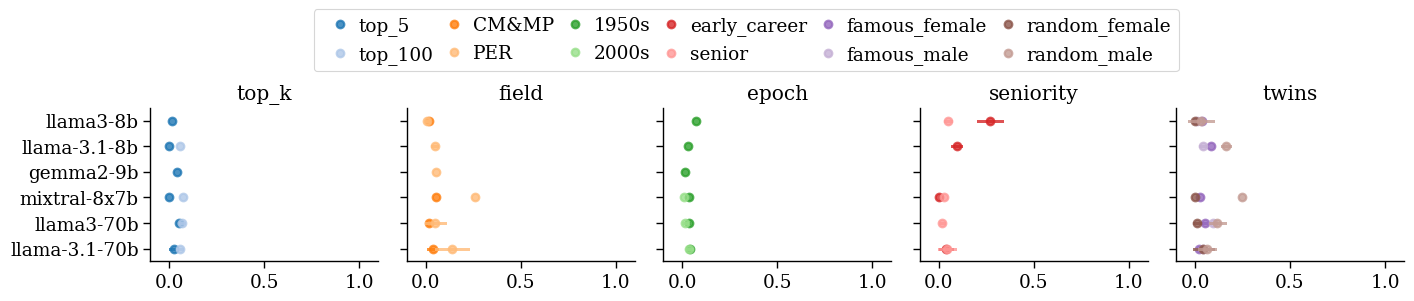

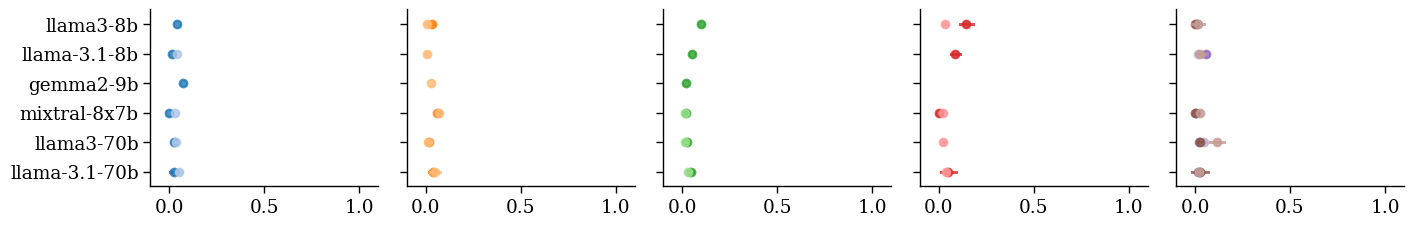

In [9]:
metrics = ['aps_scholarly_similarity', 'oa_scholarly_similarity']

for row, metric in enumerate(metrics):
    smooth = 1 if metric.startswith('n_') else 0.1
    xlim = (0,150) if metric.startswith('n_') else (0,1)
    xlim = (xlim[0]-smooth, xlim[1]+smooth)
    log = True if metric.startswith('n_') else False

    fg = vis.sns.FacetGrid(df_similarities, col='task_name',
                            palette='tab20', hue="task_param", hue_order=legend,
                            margin_titles=False,
                            height=2.5, aspect=1.15, 
                            xlim=xlim)

    fg.map(vis.sns.pointplot,  metric, "model",  order=constants.LLMS, 
           estimator='mean', errorbar=("sd", 1), 
           marker="o", ls='', 
           dodge=True,
           legend=False, 
           alpha=0.8)
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_ylabels('')
    fg.tight_layout()
    fg.fig.subplots_adjust(wspace=0.05)
    fg.set_xlabels('')

    label = f'Gini coefficient of {metric.split("_similarity")[0]}' if '_age_' in metric else \
            f'Average pairwise Jaccard similarity on {metric.split("_share")[0]}' if 'share' in metric else \
            f'Average pairwise cosine similarity of scholarly metrics' if 'scholarly_similarity' == metric else ''
    
    #fg.axes.flat[2].set_xlabel(label)

    if log:
        fg.set(xscale="symlog")

    if row == 0:
        fg.set_titles("{col_name}") 
        fg.fig.legend(loc='upper left', bbox_to_anchor=(legend_bbox, 1.25), ncol=legend_ncols, columnspacing=0.15, handletextpad=0) #, borderpad=0.2) #, labelspacing=0, handletextpad=0.1, columnspacing=0.1)
    else:
        fg.set_titles("") 


    fn = None #io.path_join(PLOTS_PATH, f"similarity_{metric}.pdf")
    vis._finish_plot(fg.fig, fn)

### For slides

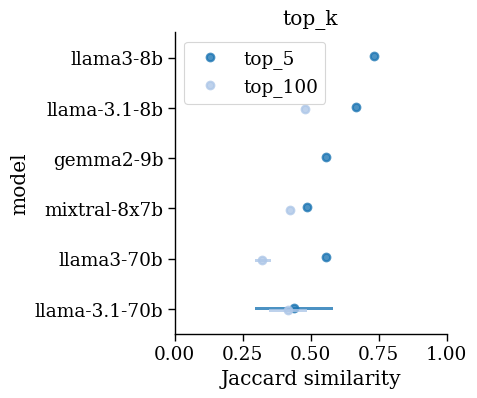

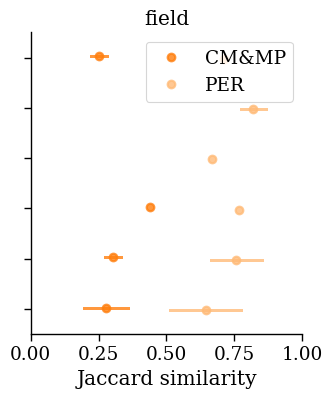

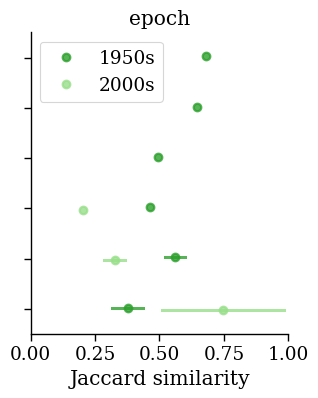

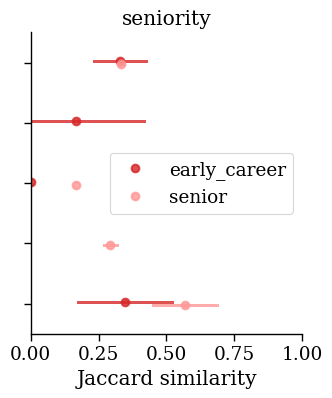

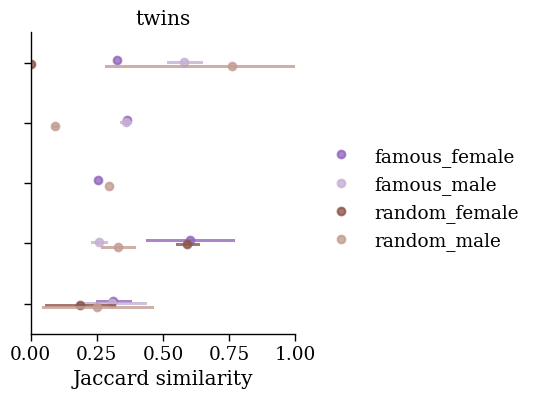

In [10]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap("tab20")
colors = [cmap(i) for i in range(20)]
colors = colors[::-1]


xx = 'country_of_affiliation_share'
xl = 'Pair fraction' if xx == 'recommended_author_pairs_are_coauthors' else 'Jaccard similarity'

for task_name in constants.EXPERIMENT_TASKS:
    
    df = df_similarities.query("task_name == @task_name")

    if task_name == "twins":
        df = df.query("task_param in ['famous_female','famous_male', 'random_male', 'random_female']")
    _colors = {v: colors.pop() for v in constants.TASK_PARAMS_BY_TASK[task_name]}
    fg = vis.sns.catplot(data=df, x=xx, y='model', 
                    kind='point', estimator=vis.np.mean, errorbar='sd',
                    legend_out=False if task_name != "twins" else True,
                    marker="o", ls='', 
                    dodge=True,
                    alpha=0.8,
                    palette=_colors,
                    height=4, aspect=1.2, hue='task_param', hue_order=[c for c in constants.TASK_PARAMS_BY_TASK[task_name] if c in df.task_param.unique()])
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.tight_layout()
    fg.set(xlim=(0,1))
    fg.set(xlabel=xl)
    fg.set(title=task_name)

    if task_name != "top_k":
        fg.set(yticklabels=[])
        fg.set(ylabel='')

    fg._legend.set_title(None)
    # break

## Networks: Institutions, Country, Coauthors

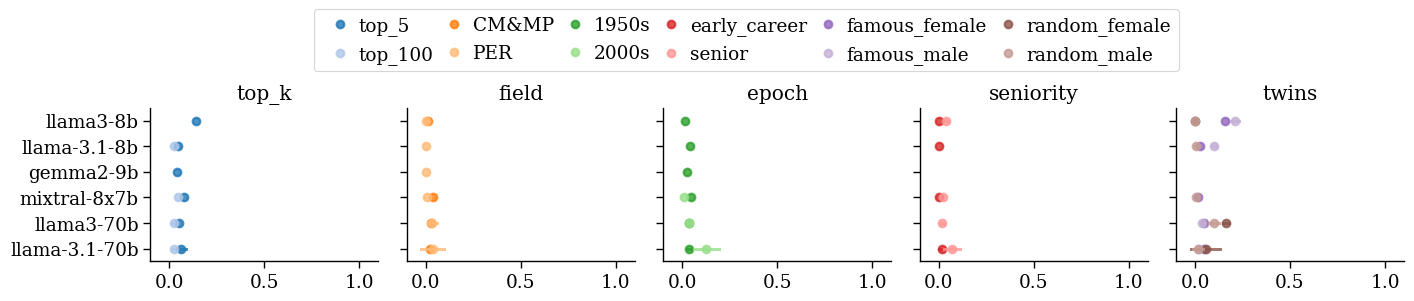

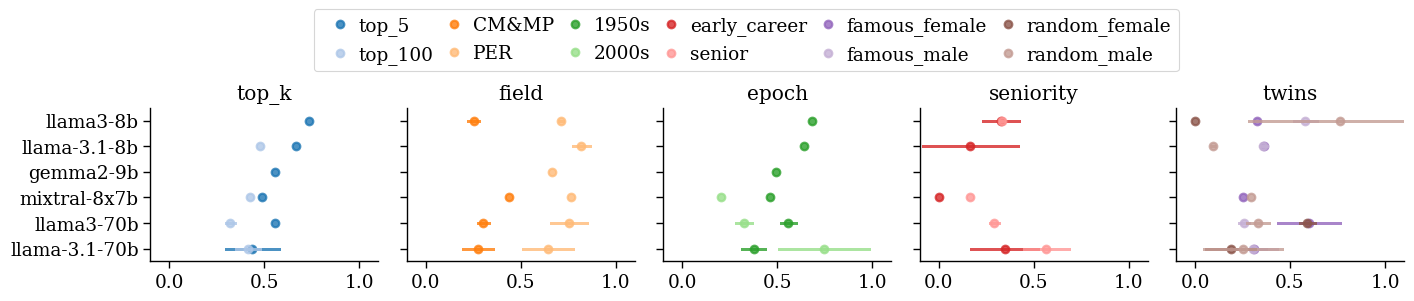

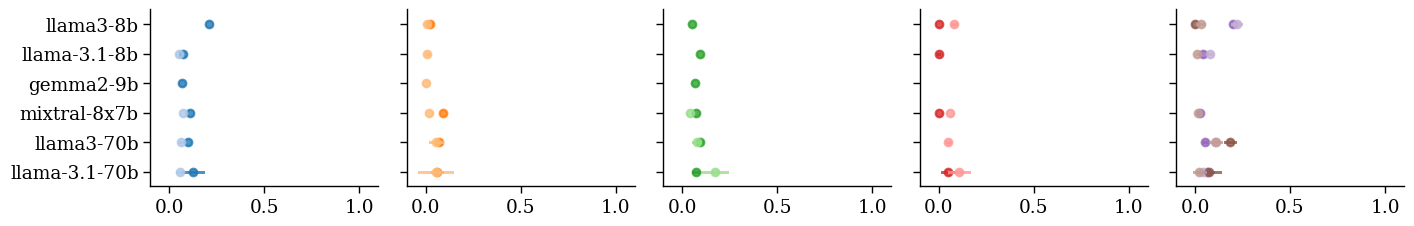

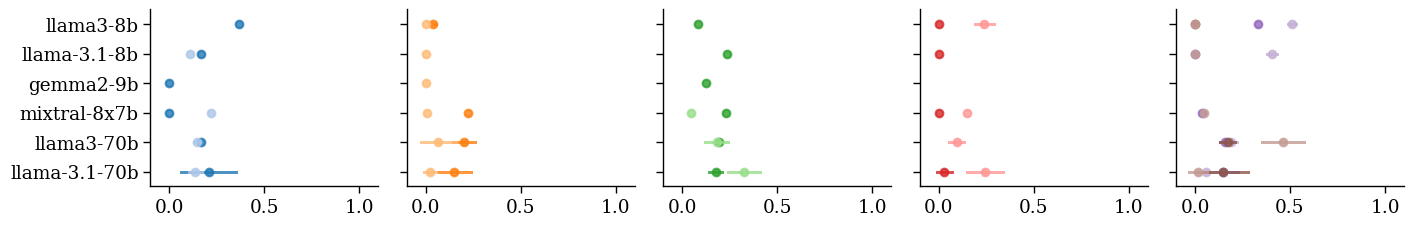

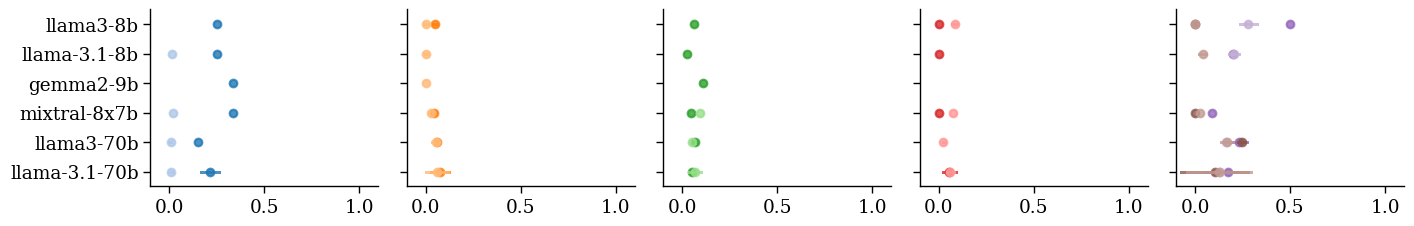

In [11]:
metrics = ['institutions_share', 'country_of_affiliation_share', 'coauthors_share', 'coauthors_recommended_share', 'recommended_author_pairs_are_coauthors']

# coauthors_share: recommended authors shared coauthors (2 hops)
# coauthors_recommended_share: coauthors among the recommendations
# recommended_author_pairs_are_coauthors: recommended authors are coauthors


for row, metric in enumerate(metrics):
    smooth = 1 if metric.startswith('n_') else 0.1
    xlim = (0,150) if metric.startswith('n_') else (0,1)
    xlim = (xlim[0]-smooth, xlim[1]+smooth)
    log = True if metric.startswith('n_') else False

    fg = vis.sns.FacetGrid(df_similarities, col='task_name',
                            palette='tab20', hue="task_param", hue_order=legend,
                            margin_titles=False,
                            height=2.5, aspect=1.15, 
                            xlim=xlim)

    fg.map(vis.sns.pointplot,  metric, "model",  order=constants.LLMS, 
           estimator='mean', errorbar=("sd", 1), 
           marker="o", ls='', 
           dodge=True,
           legend=False, 
           alpha=0.8)
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_ylabels('')
    fg.tight_layout()
    fg.fig.subplots_adjust(wspace=0.05)
    fg.set_xlabels('')

    label = f'Gini coefficient of {metric.split("_similarity")[0]}' if '_age_' in metric else \
            f'Average pairwise Jaccard similarity on {metric.split("_share")[0]}' if 'share' in metric else \
            f'Average pairwise cosine similarity of scholarly metrics' if 'scholarly_similarity' == metric else \
            'Fraction of recommended scholar pairs who are co-authors' if metric == 'recommended_author_pairs_are_coauthors' else ''
    
    # fg.axes.flat[2].set_xlabel(label)

    if log:
        fg.set(xscale="symlog")

    if row < 2:
    # if row == 0:
    # if True:
        fg.set_titles("{col_name}") 
        fg.fig.legend(loc='upper left', bbox_to_anchor=(legend_bbox, 1.25), ncol=legend_ncols, columnspacing=0.15, handletextpad=0) #, borderpad=0.2) #, labelspacing=0, handletextpad=0.1, columnspacing=0.1)
    else:
        fg.set_titles("") 


    fn = io.path_join(PLOTS_PATH, f"similarity_{metric}.pdf")
    vis._finish_plot(fg.fig, fn)

# Recommended names, authors, hallucinations

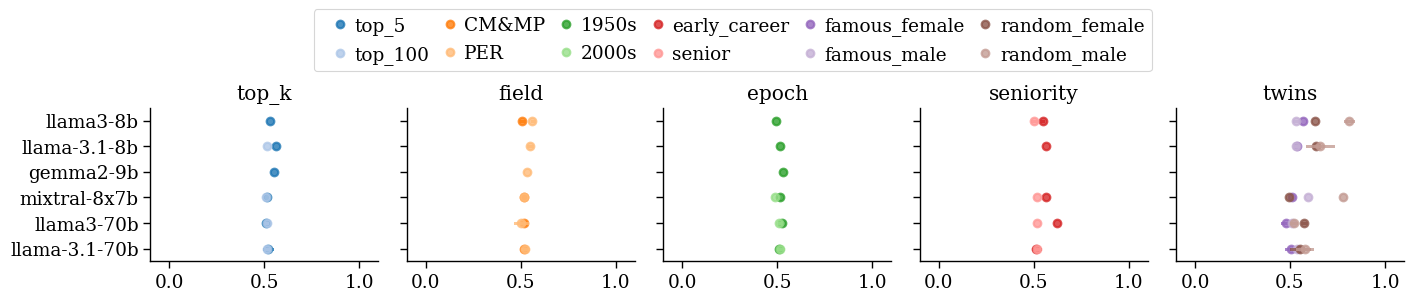

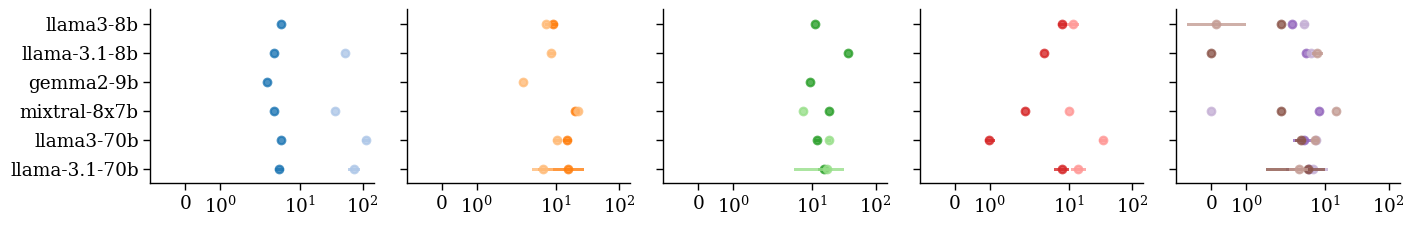

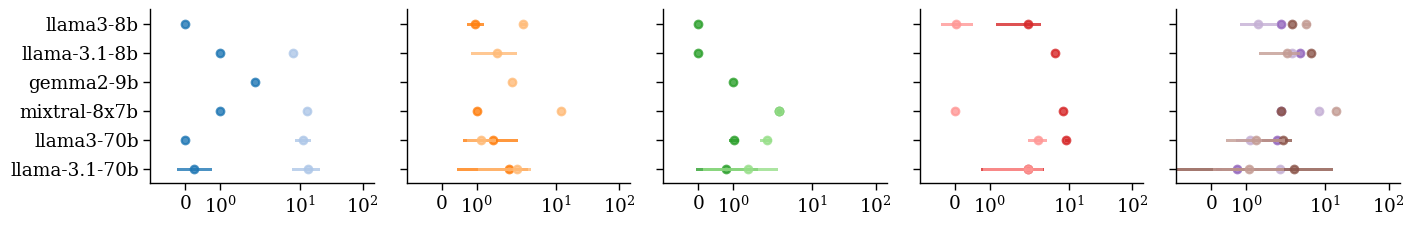

In [12]:
metrics = ['name_similarity', 'n_unique_author_recommendations','n_author_hallucinations']

for row, metric in enumerate(metrics):
    smooth = 1 if metric.startswith('n_') else 0.1
    xlim = (0,150) if metric.startswith('n_') else (0,1)
    xlim = (xlim[0]-smooth, xlim[1]+smooth)
    log = True if metric.startswith('n_') else False

    fg = vis.sns.FacetGrid(df_similarities, col='task_name',
                            palette='tab20', hue="task_param", hue_order=legend,
                            margin_titles=False,
                            height=2.5, aspect=1.15, 
                            xlim=xlim)

    fg.map(vis.sns.pointplot,  metric, "model",  order=constants.LLMS, 
           estimator='mean', errorbar=("sd", 1), 
           marker="o", ls='', 
           dodge=True,
           legend=False, 
           alpha=0.8)
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_ylabels('')
    fg.tight_layout()
    fg.fig.subplots_adjust(wspace=0.05)
    fg.set_xlabels('')

    label = 'Jaro-Winkler similarity of names' if 'name_' in metric else \
            "Average number of potential hallucinations" if metric=='n_author_hallucinations' else \
            'Average number of recommended unique authors' if metric=='n_unique_author_recommendations' else ''
    
    # fg.axes.flat[2].set_xlabel(label)

    if log:
        fg.set(xscale="symlog")

    if row == 0:
        fg.set_titles("{col_name}") 
        fg.fig.legend(loc='upper left', bbox_to_anchor=(legend_bbox, 1.25), ncol=legend_ncols, columnspacing=0.1, handletextpad=-0.2) 
    else:
        fg.set_titles("") 

    fn = io.path_join(PLOTS_PATH, f"app_similarity_{metric}.pdf")
    vis._finish_plot(fg.fig, fn)

In [13]:
df_similarities.query("model=='gemma2-9b'")[['n_unique_author_recommendations','n_author_hallucinations']].mean()

n_unique_author_recommendations    5.000000
n_author_hallucinations            1.666667
dtype: float64

# Diversity

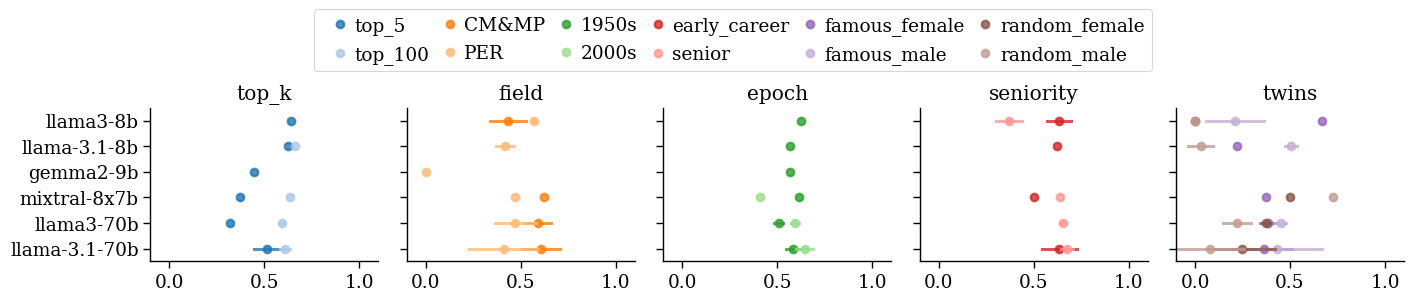

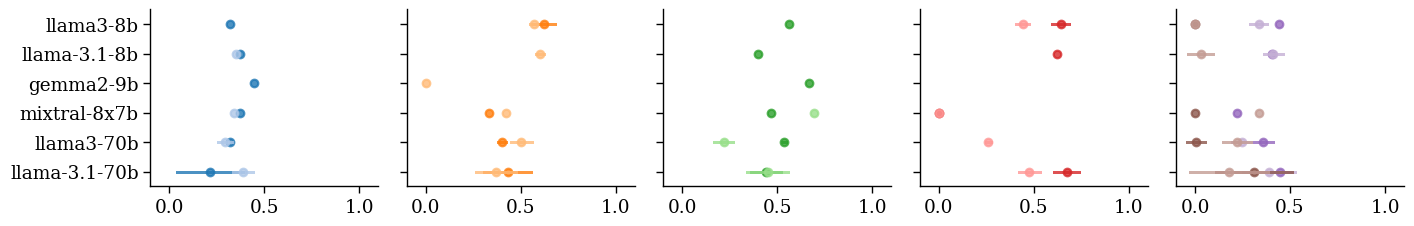

In [14]:
metrics = set(df_similarities.columns) - set(['model', 'task_name', 'task_param', 'date', 'time', 'level_5', 'group', 'n_name_recommendations'])
metrics = [m for m in metrics if 'diversity' in m ]

for row, metric in enumerate(metrics):
    smooth = 1 if metric.startswith('n_') else 0.1
    xlim = (0,150) if metric.startswith('n_') else (0,1)
    xlim = (xlim[0]-smooth, xlim[1]+smooth)
    log = True if metric.startswith('n_') else False

    fg = vis.sns.FacetGrid(df_similarities, col='task_name',
                            palette='tab20', hue="task_param", hue_order=legend,
                            margin_titles=False,
                            height=2.5, aspect=1.15, 
                            xlim=xlim)

    fg.map(vis.sns.pointplot,  metric, "model",  order=constants.LLMS, 
           estimator='mean', errorbar=("sd", 1), 
           marker="o", ls='', 
           dodge=True,
           legend=False, 
           alpha=0.8)
    
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_ylabels('')
    fg.tight_layout()
    fg.fig.subplots_adjust(wspace=0.05)
    fg.set_xlabels('')

    label = f"Simpson's diversity index on {metric.split('_')[0]}"
    # fg.axes.flat[2].set_xlabel(label)

    if log:
        fg.set(xscale="symlog")

    if row == 0:
        fg.set_titles("{col_name}") 
        fg.fig.legend(loc='upper left', bbox_to_anchor=(legend_bbox, 1.25), ncol=legend_ncols, columnspacing=0.1, handletextpad=-0.2) #, borderpad=0.2) #, labelspacing=0, handletextpad=0.1, columnspacing=0.1)
    else:
        fg.set_titles("") 

    fn = io.path_join(PLOTS_PATH, f"app_diversity_{metric}.pdf")
    vis._finish_plot(fg.fig, fn)
    